In [1]:
# Import required dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Configure matplotlib
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1(np.linspace(0, 1, 10)))

# constants
FIGURE_SAVE_LOCATION = "../data/figures/04design/"
FIGURE_PREFILE = "traces_"

In [2]:
# import trace data
conv_trace_df = pd.read_csv("../traces/AzureLLMInferenceTrace_conv_1week.csv")
code_trace_df = pd.read_csv("../traces/AzureLLMInferenceTrace_code_1week.csv")
burst_trace_df = pd.read_csv("../traces/BurstGPT_without_fails_2.csv")

In [3]:
# print stats of the conv trace
conv_trace_df.describe()

,ContextTokens,GeneratedTokens
count,2.730400e+07,2.730400e+07
mean,1.631580e+03,1.055092e+02
std,1.529639e+03,1.582525e+02
min,1.000000e+00,1.000000e+00
25%,5.460000e+02,1.400000e+01
50%,9.280000e+02,4.100000e+01
75%,2.357000e+03,1.080000e+02
max,7.999000e+03,1.500000e+03


In [4]:
# print stats of the code trace
code_trace_df.describe()

,ContextTokens,GeneratedTokens
count,1.680370e+07,1.680370e+07
mean,2.511276e+03,2.268973e+01
std,2.133541e+03,7.478323e+01
min,1.000000e+00,1.000000e+00
25%,9.380000e+02,3.000000e+00
50%,1.930000e+03,8.000000e+00
75%,3.348000e+03,1.800000e+01
max,7.743000e+03,5.000000e+03


In [5]:
# print stats of the burst trace
burst_trace_df.describe()

,Timestamp,Request tokens,Response tokens,Total tokens
count,3.784213e+06,3.784213e+06,3.784213e+06,3.784213e+06
mean,6.762544e+06,2.618355e+02,3.578809e+01,2.976236e+02
std,1.110811e+06,2.419217e+02,1.095387e+02,3.052397e+02
min,5.270414e+06,7.000000e+00,1.000000e+00,1.200000e+01
25%,6.023208e+06,1.920000e+02,7.000000e+00,2.060000e+02
50%,6.585970e+06,2.160000e+02,7.000000e+00,2.260000e+02
75%,7.378298e+06,2.570000e+02,2.800000e+01,2.680000e+02
max,1.045440e+07,3.140700e+04,1.247200e+04,3.192400e+04


Conv Trace - Max Context Tokens: 7999, Avg Context Tokens: 1631.579539612494
Code Trace - Max Context Tokens: 7743, Avg Context Tokens: 2511.27569103105


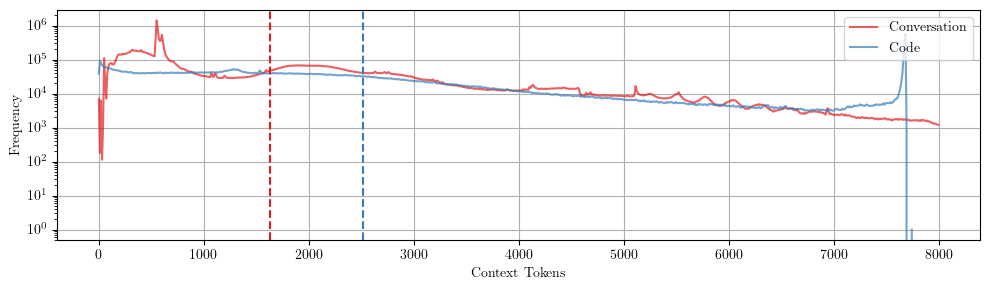

In [6]:
# extract the context tokens from the conv trace
conv_max_context_tokens = conv_trace_df['ContextTokens'].max()
conv_bins = np.arange(0, conv_max_context_tokens + 10, 10)
conv_hist, conv_bin_edges = np.histogram(conv_trace_df['ContextTokens'], bins=conv_bins)
conv_avg_context_tokens = conv_trace_df['ContextTokens'].mean()
print(f"Conv Trace - Max Context Tokens: {conv_max_context_tokens}, Avg Context Tokens: {conv_avg_context_tokens}")

# extract the context tokens from the code trace
code_max_context_tokens = code_trace_df['ContextTokens'].max()
code_bins = np.arange(0, code_max_context_tokens + 10, 10)
code_hist, code_bin_edges = np.histogram(code_trace_df['ContextTokens'], bins=code_bins)
code_avg_context_tokens = code_trace_df['ContextTokens'].mean()
print(f"Code Trace - Max Context Tokens: {code_max_context_tokens}, Avg Context Tokens: {code_avg_context_tokens}")

# Plot histogram
plt.figure(figsize=(10, 3))
plt.plot(conv_bin_edges[:-1], conv_hist, alpha=0.7, label='Conversation')
plt.plot(code_bin_edges[:-1], code_hist, alpha=0.7, label='Code')
plt.axvline(x=conv_avg_context_tokens, linestyle='--', color='C0')
plt.axvline(x=code_avg_context_tokens, linestyle='--', color='C1')
# plt.title("Context Tokens Distribution (Azure LLM)")
plt.xlabel("Context Tokens")
plt.ylabel("Frequency")
plt.grid()
plt.yscale('log')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(f"{FIGURE_SAVE_LOCATION}{FIGURE_PREFILE}azure_context_tokens_distribution.pdf", bbox_inches='tight')

Conv Trace - Max Generated Tokens: 1500, Avg Generated Tokens: 105.5091875003365
Code Trace - Max Generated Tokens: 5000, Avg Generated Tokens: 22.689729967129253


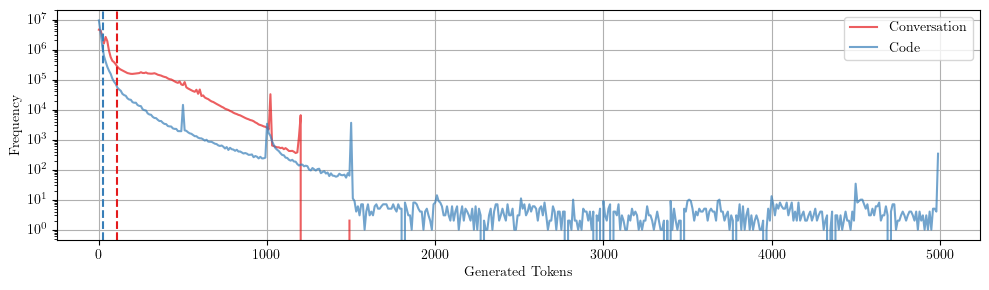

In [7]:
# extract the generated tokens from the conv trace
conv_max_generated_tokens = conv_trace_df['GeneratedTokens'].max()
conv_bins = np.arange(0, conv_max_generated_tokens + 10, 10)
conv_hist, conv_bin_edges = np.histogram(conv_trace_df['GeneratedTokens'], bins=conv_bins)
conv_avg_generated_tokens = conv_trace_df['GeneratedTokens'].mean()
print(f"Conv Trace - Max Generated Tokens: {conv_max_generated_tokens}, Avg Generated Tokens: {conv_avg_generated_tokens}")

# extract the generated tokens from the code trace
code_max_generated_tokens = code_trace_df['GeneratedTokens'].max()
code_bins = np.arange(0, code_max_generated_tokens + 10, 10)
code_hist, code_bin_edges = np.histogram(code_trace_df['GeneratedTokens'], bins=code_bins)
code_avg_generated_tokens = code_trace_df['GeneratedTokens'].mean()
print(f"Code Trace - Max Generated Tokens: {code_max_generated_tokens}, Avg Generated Tokens: {code_avg_generated_tokens}")

# Plot histogram
plt.figure(figsize=(10, 3))
plt.plot(conv_bin_edges[:-1], conv_hist, alpha=0.7, label='Conversation')
plt.plot(code_bin_edges[:-1], code_hist, alpha=0.7, label='Code')
plt.axvline(x=conv_avg_generated_tokens, linestyle='--', color='C0')
plt.axvline(x=code_avg_generated_tokens, linestyle='--', color='C1')
# plt.title("Generated Tokens Distribution (Azure LLM)")
plt.xlabel("Generated Tokens")
plt.ylabel("Frequency")
plt.grid()
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.savefig(f"{FIGURE_SAVE_LOCATION}{FIGURE_PREFILE}azure_generated_tokens_distribution.pdf", bbox_inches='tight')

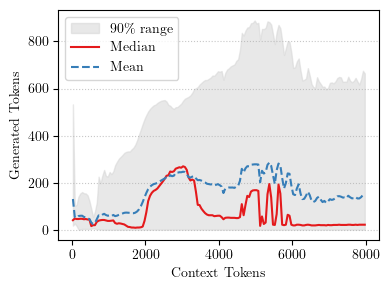

In [8]:
# extract the context and generated tokens from the conv trace
conv_max_context_tokens = conv_trace_df['ContextTokens'].max()
conv_avg_context_tokens = conv_trace_df['ContextTokens'].mean()
conv_max_generated_tokens = conv_trace_df['GeneratedTokens'].max()
conv_avg_generated_tokens = conv_trace_df['GeneratedTokens'].mean()
bin_size = 50
conv_bins  = np.arange(0, conv_max_context_tokens + bin_size, bin_size)
conv_trace_df['context_bin'] = pd.cut(conv_trace_df['ContextTokens'], bins=conv_bins)

# group by context bin and compute mean, median, p05, p95
grp = conv_trace_df.groupby('context_bin', observed=True)['GeneratedTokens']
conv_mean_gen = grp.mean()
conv_median_gen = grp.median()
conv_p05 = grp.quantile(0.05)
conv_p95 = grp.quantile(0.95)
bin_centers = np.array([iv.mid for iv in conv_mean_gen.index])
mask = (~np.isnan(conv_p05.values)) & (~np.isnan(conv_p95.values))

# Plot the generated tokens vs context tokens
plt.figure(figsize=(4,3))
plt.fill_between(
    bin_centers[mask],
    conv_p05.values[mask],
    conv_p95.values[mask],
    color='lightgray', alpha=0.5,
    label='90\\% range'
)
plt.plot(bin_centers[mask], conv_median_gen.values[mask], color='C0', label='Median')
plt.plot(bin_centers[mask], conv_mean_gen.values[mask], color='C1', linestyle='--', label='Mean')
plt.xlabel('Context Tokens')
plt.ylabel('Generated Tokens')
# plt.title('Generated vs Context Tokens (Azure LLM Conversation Trace)')
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.tight_layout()
plt.savefig(f"{FIGURE_SAVE_LOCATION}{FIGURE_PREFILE}azure_conv_gen_vs_context.pdf", bbox_inches='tight')

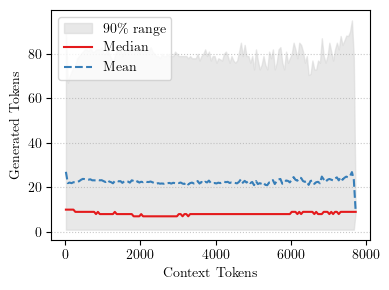

In [9]:
# extract the context and generated tokens from the code trace
code_max_context_tokens = code_trace_df['ContextTokens'].max()
code_avg_context_tokens = code_trace_df['ContextTokens'].mean()
code_max_generated_tokens = code_trace_df['GeneratedTokens'].max()
code_avg_generated_tokens = code_trace_df['GeneratedTokens'].mean()
bin_size = 50
code_bins  = np.arange(0, code_max_context_tokens + bin_size, bin_size)
code_trace_df['context_bin'] = pd.cut(code_trace_df['ContextTokens'], bins=code_bins)

# group by context bin and compute mean, median, p05, p95
grp = code_trace_df.groupby('context_bin', observed=True)['GeneratedTokens']
code_mean_gen = grp.mean()
code_median_gen = grp.median()
code_p05 = grp.quantile(0.05)
code_p95 = grp.quantile(0.95)
bin_centers = np.array([iv.mid for iv in code_mean_gen.index])
mask = (~np.isnan(code_p05.values)) & (~np.isnan(code_p95.values))

# Plot the generated tokens vs context tokens
plt.figure(figsize=(4,3))
plt.fill_between(
    bin_centers[mask],
    code_p05.values[mask],
    code_p95.values[mask],
    color='lightgray', alpha=0.5,
    label='90\\% range'
)
plt.plot(bin_centers[mask], code_median_gen.values[mask], color='C0', label='Median')
plt.plot(bin_centers[mask], code_mean_gen.values[mask], color='C1', linestyle='--', label='Mean')
plt.xlabel('Context Tokens')
plt.ylabel('Generated Tokens')
# plt.title('Generated vs Context Tokens (Azure LLM Code Trace)')
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.tight_layout()
plt.savefig(f"{FIGURE_SAVE_LOCATION}{FIGURE_PREFILE}azure_code_gen_vs_context.pdf", bbox_inches='tight')

Burst Conv Trace - Max Context Tokens: 31407, Avg Context Tokens: 854.595292340613
Burst Code Trace - Max Context Tokens: 17116, Avg Context Tokens: 249.12435029669874


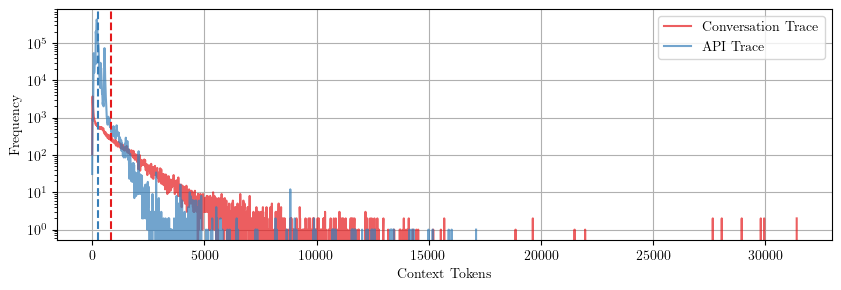

In [10]:
# extract the context tokens (conversation) from the burst trace
burst_conv_trace_df = burst_trace_df[burst_trace_df['Log Type'] == 'Conversation log']
burst_conv_max_context_tokens = burst_conv_trace_df['Request tokens'].max()
burst_conv_bins = np.arange(0, burst_conv_max_context_tokens + 10, 10)
burst_conv_hist, burst_conv_bin_edges = np.histogram(burst_conv_trace_df['Request tokens'], bins=burst_conv_bins)
burst_conv_avg_context_tokens = burst_conv_trace_df['Request tokens'].mean()
print(f"Burst Conv Trace - Max Context Tokens: {burst_conv_max_context_tokens}, Avg Context Tokens: {burst_conv_avg_context_tokens}")

# extract the context tokens (code) from the burst trace
burst_code_trace_df = burst_trace_df[burst_trace_df['Log Type'] == 'API log']
burst_code_max_context_tokens = burst_code_trace_df['Request tokens'].max()
burst_code_bins = np.arange(0, burst_code_max_context_tokens + 10, 10)
burst_code_hist, burst_code_bin_edges = np.histogram(burst_code_trace_df['Request tokens'], bins=burst_code_bins)
burst_code_avg_context_tokens = burst_code_trace_df['Request tokens'].mean()
print(f"Burst Code Trace - Max Context Tokens: {burst_code_max_context_tokens}, Avg Context Tokens: {burst_code_avg_context_tokens}")

# Plot histogram
plt.figure(figsize=(10, 3))
plt.plot(burst_conv_bin_edges[:-1], burst_conv_hist, alpha=0.7, label='Conversation Trace')
plt.plot(burst_code_bin_edges[:-1], burst_code_hist, alpha=0.7, label='API Trace')
plt.axvline(x=burst_conv_avg_context_tokens, linestyle='--', color='C0')
plt.axvline(x=burst_code_avg_context_tokens, linestyle='--', color='C1')
# plt.title("Context Tokens Distribution (BurstGPT)")
plt.xlabel("Context Tokens")
plt.ylabel("Frequency")
plt.grid()
plt.yscale('log')
plt.legend(loc='upper right')
plt.savefig(f"{FIGURE_SAVE_LOCATION}{FIGURE_PREFILE}burst_context_tokens_distribution.pdf", bbox_inches='tight')

Burst Conv Trace - Max Generated Tokens: 2048, Avg Generated Tokens: 263.1853735288564
Burst Code Trace - Max Generated Tokens: 12472, Avg Generated Tokens: 30.911789618135334


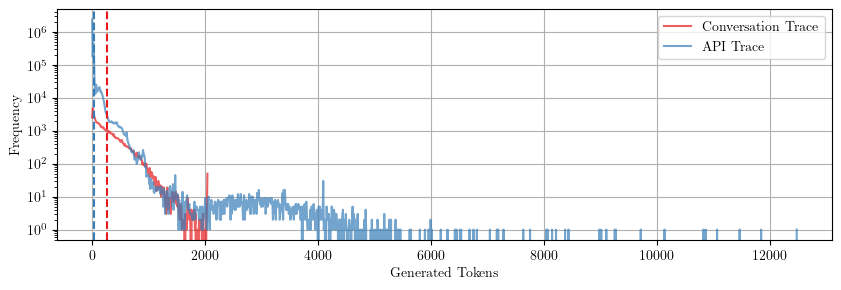

In [11]:
# extract the generated tokens (conversation) from the burst trace
burst_conv_trace_df = burst_trace_df[burst_trace_df['Log Type'] == 'Conversation log']
burst_conv_max_generated_tokens = burst_conv_trace_df['Response tokens'].max()
burst_conv_bins = np.arange(0, burst_conv_max_generated_tokens + 10, 10)
burst_conv_hist, burst_conv_bin_edges = np.histogram(burst_conv_trace_df['Response tokens'], bins=burst_conv_bins)
burst_conv_avg_generated_tokens = burst_conv_trace_df['Response tokens'].mean()
print(f"Burst Conv Trace - Max Generated Tokens: {burst_conv_max_generated_tokens}, Avg Generated Tokens: {burst_conv_avg_generated_tokens}")

# extract the generated tokens (code) from the burst trace
burst_code_trace_df = burst_trace_df[burst_trace_df['Log Type'] == 'API log']
burst_code_max_generated_tokens = burst_code_trace_df['Response tokens'].max()
burst_code_bins = np.arange(0, burst_code_max_generated_tokens + 10, 10)
burst_code_hist, burst_code_bin_edges = np.histogram(burst_code_trace_df['Response tokens'], bins=burst_code_bins)
burst_code_avg_generated_tokens = burst_code_trace_df['Response tokens'].mean()
print(f"Burst Code Trace - Max Generated Tokens: {burst_code_max_generated_tokens}, Avg Generated Tokens: {burst_code_avg_generated_tokens}")

# Plot histogram
plt.figure(figsize=(10, 3))
plt.plot(burst_conv_bin_edges[:-1], burst_conv_hist, alpha=0.7, label=' Conversation Trace')
plt.plot(burst_code_bin_edges[:-1], burst_code_hist, alpha=0.7, label='API Trace')
plt.axvline(x=burst_conv_avg_generated_tokens, linestyle='--', color='C0')
plt.axvline(x=burst_code_avg_generated_tokens, linestyle='--', color='C1')
# plt.title("Generated Tokens Distribution (BurstGPT)")
plt.xlabel("Generated Tokens")
plt.ylabel("Frequency")
plt.grid()
plt.yscale('log')
plt.legend()
plt.savefig(f"{FIGURE_SAVE_LOCATION}{FIGURE_PREFILE}burst_generated_tokens_distribution.pdf", bbox_inches='tight')

/var/folders/y0/2k6mgl4x5_db4cbjlvjsc0jw0000gn/T/ipykernel_75511/2452960631.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  burst_conv_trace_df['context_bin'] = pd.cut(


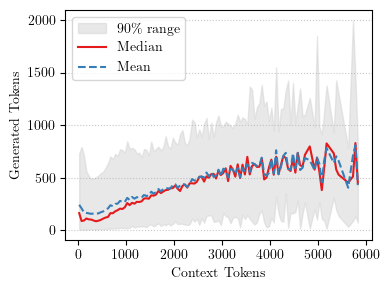

In [12]:
# extract the context tokens and generated tokens (Conversation) from the burst trace
burst_conv_max_context_tokens   = burst_conv_trace_df['Request tokens'].max()
burst_conv_avg_context_tokens   = burst_conv_trace_df['Request tokens'].mean()
burst_conv_max_generated_tokens = burst_conv_trace_df['Response tokens'].max()
burst_conv_avg_generated_tokens = burst_conv_trace_df['Response tokens'].mean()
burst_bin_size  = 50
burst_conv_bins = np.arange(0, burst_conv_max_context_tokens + burst_bin_size, burst_bin_size)
burst_conv_trace_df['context_bin'] = pd.cut(
    burst_conv_trace_df['Request tokens'],
    bins=burst_conv_bins
)

# group by context bin and compute mean, median, p05, p95
grp = burst_conv_trace_df.groupby('context_bin', observed=True)['Response tokens']
burst_counts         = grp.count()       # how many samples per bin
burst_conv_mean_gen  = grp.mean()
burst_conv_median_gen= grp.median()
burst_conv_p05       = grp.quantile(0.05)
burst_conv_p95       = grp.quantile(0.95)

# filter out bins with too few samples
min_samples = 20
good_bins = burst_counts[burst_counts >= min_samples].index
burst_conv_mean_gen   = burst_conv_mean_gen.loc[good_bins]
burst_conv_median_gen = burst_conv_median_gen.loc[good_bins]
burst_conv_p05        = burst_conv_p05.loc[good_bins]
burst_conv_p95        = burst_conv_p95.loc[good_bins]

# get the bin centers
burst_bin_centers = np.array([iv.mid for iv in good_bins])

# Plot the generated tokens vs context tokens
plt.figure(figsize=(4,3))
plt.fill_between(
    burst_bin_centers,
    burst_conv_p05.values,
    burst_conv_p95.values,
    color='lightgray', alpha=0.5,
    label=r'90\% range'
)
plt.plot(
    burst_bin_centers,
    burst_conv_median_gen.values,
    color='C0', label='Median'
)
plt.plot(
    burst_bin_centers,
    burst_conv_mean_gen.values,
    color='C1', linestyle='--', label='Mean'
)
plt.xlabel('Context Tokens')
plt.ylabel('Generated Tokens')
# plt.title('Generated vs Context Tokens (BurstGPT Conversation Trace)')
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.tight_layout()
plt.savefig(f"{FIGURE_SAVE_LOCATION}{FIGURE_PREFILE}burst_conv_gen_vs_context.pdf", bbox_inches='tight')

/var/folders/y0/2k6mgl4x5_db4cbjlvjsc0jw0000gn/T/ipykernel_75511/572509324.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  burst_code_trace_df['context_bin'] = pd.cut(


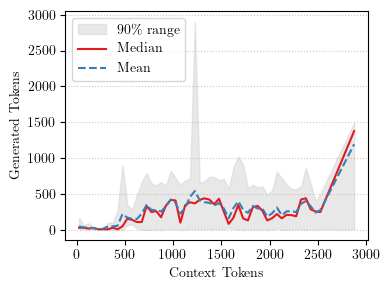

In [13]:
# extract the context tokens and generated tokens (API) from the burst trace
burst_code_max_context_tokens   = burst_code_trace_df['Request tokens'].max()
burst_code_avg_context_tokens   = burst_code_trace_df['Request tokens'].mean()
burst_code_max_generated_tokens = burst_code_trace_df['Response tokens'].max()
burst_code_avg_generated_tokens = burst_code_trace_df['Response tokens'].mean()
burst_bin_size  = 50
burst_code_bins = np.arange(0, burst_code_max_context_tokens + burst_bin_size, burst_bin_size)
burst_code_trace_df['context_bin'] = pd.cut(
    burst_code_trace_df['Request tokens'],
    bins=burst_code_bins
)

# group by context bin and compute mean, median, p05, p95
grp = burst_code_trace_df.groupby('context_bin', observed=True)['Response tokens']
burst_counts         = grp.count()       # how many samples per bin
burst_code_mean_gen  = grp.mean()
burst_code_median_gen= grp.median()
burst_code_p05       = grp.quantile(0.05)
burst_code_p95       = grp.quantile(0.95)

# filter out bins with too few samples
min_samples = 20
good_bins = burst_counts[burst_counts >= min_samples].index
burst_code_mean_gen   = burst_code_mean_gen.loc[good_bins]
burst_code_median_gen = burst_code_median_gen.loc[good_bins]
burst_code_p05        = burst_code_p05.loc[good_bins]
burst_code_p95        = burst_code_p95.loc[good_bins]

# get the bin centers
burst_bin_centers = np.array([iv.mid for iv in good_bins])

# Plot the generated tokens vs context tokens
plt.figure(figsize=(4,3))
plt.fill_between(
    burst_bin_centers,
    burst_code_p05.values,
    burst_code_p95.values,
    color='lightgray', alpha=0.5,
    label=r'90\% range'
)
plt.plot(
    burst_bin_centers,
    burst_code_median_gen.values,
    color='C0', label='Median'
)
plt.plot(
    burst_bin_centers,
    burst_code_mean_gen.values,
    color='C1', linestyle='--', label='Mean'
)
plt.xlabel('Context Tokens')
plt.ylabel('Generated Tokens')
# plt.title('Generated vs Context Tokens (BurstGPT API Trace)')
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.tight_layout()
plt.savefig(f"{FIGURE_SAVE_LOCATION}{FIGURE_PREFILE}burst_code_gen_vs_context.pdf", bbox_inches='tight')

In [14]:
def extract_trace_to_csv(trace, csv_file):
    # count the occurrences of values in range 0 to trace.max() + 1
    hist, bin_edges = np.histogram(trace, bins=np.arange(0, trace.max() + 2))

    # save the histogram to a CSV file
    df = pd.DataFrame({
        'Length': bin_edges[:-1],
        'Count': hist,
        'Probability': hist / hist.sum()
    })

    # save the DataFrame to a CSV file
    df.to_csv(csv_file, index=False)

    return df

# Extract Context Tokens (Azure LLM) trace to CSV
conv_context_tokens_df = extract_trace_to_csv(conv_trace_df['ContextTokens'], '../traces/conv_context_tokens_hist.csv')
code_context_tokens_df = extract_trace_to_csv(code_trace_df['ContextTokens'], '../traces/code_context_tokens_hist.csv')

# Extract Generated Tokens (Azure LLM) trace to CSV
conv_generated_tokens_df = extract_trace_to_csv(conv_trace_df['GeneratedTokens'], '../traces/conv_generated_tokens_hist.csv')
code_generated_tokens_df = extract_trace_to_csv(code_trace_df['GeneratedTokens'], '../traces/code_generated_tokens_hist.csv')

# Extract Context Tokens (BurstGPT) trace to CSV
burst_conv_context_tokens_df = extract_trace_to_csv(burst_conv_trace_df['Request tokens'], '../traces/burst_conv_context_tokens_hist.csv')
burst_code_context_tokens_df = extract_trace_to_csv(burst_code_trace_df['Request tokens'], '../traces/burst_code_context_tokens_hist.csv')

# Extract Generated Tokens (BurstGPT) trace to CSV
burst_conv_generated_tokens_df = extract_trace_to_csv(burst_conv_trace_df['Response tokens'], '../traces/burst_conv_generated_tokens_hist.csv')
burst_code_generated_tokens_df = extract_trace_to_csv(burst_code_trace_df['Response tokens'], '../traces/burst_code_generated_tokens_hist.csv')

Sum of generated PDF: 0.9999999999999999


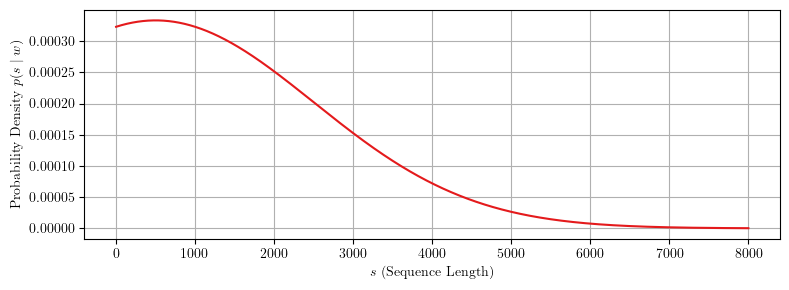

In [15]:
from scipy.stats import norm
from scipy.integrate import quad

def generate_trace_pdf(max_x, mu=100, sigma=75):
    # Define the unnormalized truncated PDF
    def truncated_gaussian(x):
        return norm.pdf(x, loc=mu, scale=sigma) if x >= 0 else 0

    # Compute normalization constant over [0, inf)
    normalization_constant, _ = quad(truncated_gaussian, 0, np.inf)

    # Define the normalized PDF
    def normalized_pdf(x):
        return truncated_gaussian(x) / normalization_constant

    # Generate x values at integer intervals
    x_vals = np.arange(0, max_x + 1, 1)
    # Compute PDF values
    y_vals = np.array([normalized_pdf(xi) for xi in x_vals])

    return x_vals, y_vals

# # Generate the PDF for context tokens
generated_trace_pdf = generate_trace_pdf(max_x=8000, mu=500, sigma=2000)

#  generate a test PDF for context tokens (with uniform distribution, manually, 100 samples)
# size = 500
# pdf_x_vals = np.arange(0, size, 1)
# pdf_y_vals = np.array([1/size] * size)  # uniform distribution
# generated_trace_pdf = (pdf_x_vals, pdf_y_vals)

# Save the generated PDF to a CSV file
generated_trace_pdf_df = pd.DataFrame({
    'Length': generated_trace_pdf[0],
    'Probability': generated_trace_pdf[1]
})
generated_trace_pdf_df.to_csv('../traces/generated_trace_pdf.csv', index=False)

# normalize the generated PDF so that its sum is 1
normalized_pdf_values = generated_trace_pdf[1] / generated_trace_pdf[1].sum()
generated_trace_pdf = (generated_trace_pdf[0], normalized_pdf_values)

# print the sum of the generated PDF
print(f"Sum of generated PDF: {generated_trace_pdf[1].sum()}")

# plot the generated PDF
plt.figure(figsize=(8, 3))
plt.plot(generated_trace_pdf[0], generated_trace_pdf[1], color='C0')
plt.xlabel(r'$s$ (Sequence Length)')
plt.ylabel(r'Probability Density $p(s \mid w)$')
plt.grid()
plt.tight_layout()
plt.tight_layout()
plt.savefig(f"{FIGURE_SAVE_LOCATION}{FIGURE_PREFILE}prefill_sample.pdf", bbox_inches='tight', format="pdf")

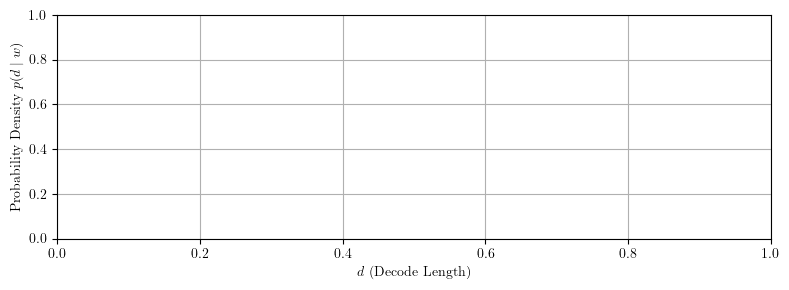

In [16]:
# plot the generated PDF
plt.figure(figsize=(8, 3))
plt.xlabel(r'$d$ (Decode Length)')
plt.ylabel(r'Probability Density $p(d \mid w)$')
plt.grid()
plt.tight_layout()
plt.tight_layout()
plt.savefig(f"{FIGURE_SAVE_LOCATION}{FIGURE_PREFILE}decode_sample.pdf", bbox_inches='tight', format="pdf")